# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
#seu código aqui
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')

In [3]:
X_test

,Age,Income,Number of Children,Gender_LE,Marital Status_LE,Home Ownership_LE,Credit Score_LE,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.000000,5500000.0,0,0,1,1,0,1,0,0,0
1,48.000000,8750000.0,1,0,0,0,1,0,1,0,0
2,26.000000,5500000.0,1,0,0,0,0,1,0,0,0
3,39.000000,6250000.0,2,0,0,0,1,1,0,0,0
4,35.000000,9000000.0,1,0,0,0,1,0,1,0,0
5,25.000000,5500000.0,0,0,1,1,0,1,0,0,0
6,48.000000,8250000.0,1,0,0,0,1,0,1,0,0
7,48.000000,8250000.0,1,0,0,0,1,0,1,0,0
8,36.000000,9500000.0,2,0,0,0,1,0,0,0,1
9,37.507692,9500000.0,1,0,0,0,1,0,0,1,0


In [4]:
X_train

,Age,Income,Number of Children,Gender_LE,Marital Status_LE,Home Ownership_LE,Credit Score_LE,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,26.000000,4.500000e+06,0,0,1,1,0,0,0,0,0
1,29.000000,2.750000e+06,0,0,1,1,2,0,0,1,0
2,25.000000,6.250000e+06,0,0,1,1,0,1,0,0,0
3,29.000000,6.800000e+06,2,0,0,0,0,0,1,0,0
4,31.000000,6.500000e+06,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
247,27.139269,3.680365e+06,0,0,1,1,2,0,0,0,0
248,27.000000,3.750000e+06,0,0,1,1,2,0,0,1,0
249,28.510747,2.994626e+06,0,0,1,1,2,0,0,0,0
250,27.417411,3.541294e+06,0,0,1,1,2,0,0,0,0


In [5]:
y_test

,Credit Score
0,Average
1,High
2,Average
3,High
4,High
5,Average
6,High
7,High
8,High
9,High


In [6]:
y_train

,Credit Score
0,Average
1,Low
2,Average
3,Average
4,Average
...,...
247,Low
248,Low
249,Low
250,Low


In [7]:
# Verificar se as classes estão balanceadas em y_test
test_balance = y_test.value_counts()
print("Balanceamento em y_test:")
print(test_balance)

Balanceamento em y_test:
Credit Score
High            29
Average          6
Low              6
Name: count, dtype: int64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [8]:
#seu código aqui
# Criar uma instância do classificador Naive Bayes Gaussiano
naive_churn = GaussianNB()
# Treinar o classificador usando os dados de treinamento
naive_churn.fit(X_train, y_train)

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

In [9]:
#seu código aqui
# Fazer previsões para os dados de treino
y_pred_train = naive_churn.predict(X_train)
# Calcular a acurácia
accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia:", accuracy)

Acurácia: 0.9444444444444444


O modelo apresenta um desempenho alto, acertando suas previsões aproximadamente 95% das vezes no conjunto de dados de treinamento.

In [10]:
recall = recall_score(y_train, y_pred_train, average='macro')
print("Recall:", recall)

Recall: 0.9444444444444445


O valor alto do recall indica que o modelo consegue identificar corretamente aproximadamente 95% dos casos positivos em cada classe.

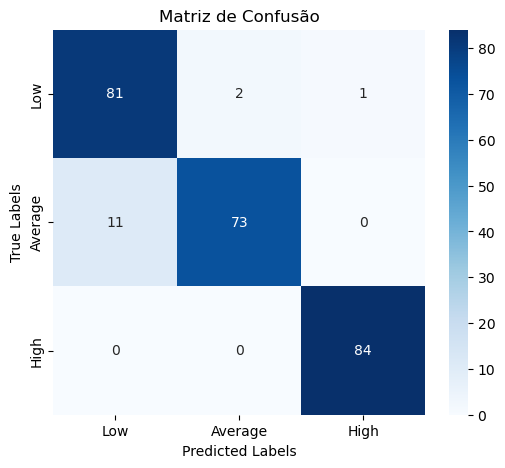

In [11]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Definindo os nomes das classes
class_names = ['Low', 'Average', 'High']

# Criando o gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configurando rótulos
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")

# Exibindo o gráfico
plt.show()

A matriz de confusão nos permite entender as seguintes informações:

- Classe Low: alto desempenho para classificar, com poucos erros;
- Classe Average: desempenho médio, tendo 11 erros de classificação (classe Average classificada como Low);
- Classe High: desempenho perfeito.

O modelo apresenta um alto desempenho geral, com alta acurácia e recall.
No entanto, há um problema na classificação do score Average, que teve 11 amostras classificadas como classe Low, o que sugere uma dificuldade do modelo em diferenciar tais classes na nossa base de dados.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [12]:
#seu código aqui
y_pred_test = naive_churn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='macro')

print("Acurácia:", accuracy)
print("Recall:", recall)

Acurácia: 0.926829268292683
Recall: 0.9655172413793104


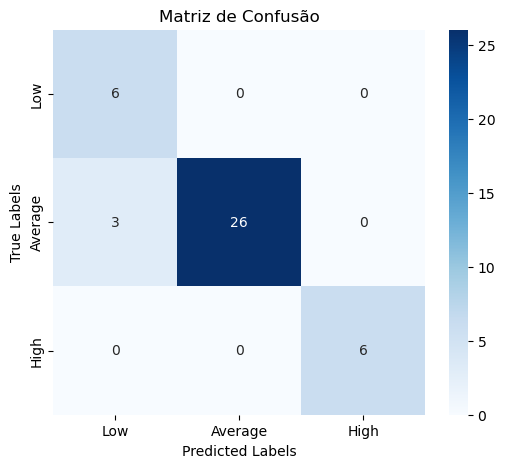

In [13]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Definindo os nomes das classes
class_names = ['Low', 'Average', 'High']

# Criando o gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configurando rótulos
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusão")

# Exibindo o gráfico
plt.show()

O modelo apresenta uma acurácia relativamente menor (93%), mas ainda assim, com um desempenho elevado, com alto índice de acerto de suas previsões.

O recall continua apresentando um retorno de casos positivos para cada classe elevado, ainda mais (97%) do que na base de treinamento.

A matriz de confusão indica que, para a base de teste, há uma desempenho superior ao observado no treino.

Todas essas informações conferem que o modelo executado tem uma resposta relativamente alta para os dados sobre os quais foi aplicado, mesmo que em uma base desbalanceada.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

O projeto faz referência ao **desenvolvimento de um modelo** capaz de *prever a classificação* do score de crédito de clientes de acordo com suas características financeiras. Para tal, utilizamos o **algoritmo de Naive Bayes**, eficiente em problemas de *classificação*.

O *objetivo* ao aplicar tal algoritmo para desenvolver o modelo é ser **capaz de classificar os clientes com base nas classes de crédito**, de maneira *rápida e eficaz*, para entender o risco financeiro que os mesmos representam à instituições credoras, para que elas *tomem decisões assertivas* quanto à concessão de crédito.

Nosso modelo, por fim, apresentou **bom desempenho** na predição, com **acurácia e recall acima de 90 e 95%**, respectivamente, sendo **confiável** para **auxiliar na tomada de decisões** de instituições financeiras quando da avaliação de crédito de seus clientes.